# Plots the DFT ground state energy of the combined hBN-water system as a function of k-mesh size.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def make_df(data_path, ryd_per_ev=0.0734986176, mev_per_ev=1000):
    df = pd.read_table(
        data_path,
        delim_whitespace=True,
        header=None,
        names=[
            "system",
            "functional",
            "ecp",
            "ecut_ev",
            "Nk",
            "Ns",
            "total_energy_ryd",
        ],
    )
    df["total_energy_ev"] = df["total_energy_ryd"].values / ryd_per_ev
    df["total_energy_mev"] = df["total_energy_ev"].values * mev_per_ev
    return df


def plot_kmesh_extrapolation(
    df, basis_sizes, int_energies, plot_int_energy=True
):
    functional = df["functional"].values[0]
    ecp = df["ecp"].values[0]
    ecut_ev = df["ecut_ev"].values[0]
    Ns = df["Ns"].values[0]
    plt.figure(figsize=(5, 5))
    plt.title(
        f"k-mesh extrapolation for hBN-water system"
        + f"\n {functional}, {ecp}, E$_{{cut}}$ = {ecut_ev} eV, {Ns}x{Ns}x1 supercell"
    )
    plt.xlabel(r"$N_{k_x} \cdot N_{k_y}$")
    if plot_int_energy:
        plt.ylabel("DFT interaction energy (meV)")
        plt.plot(
            basis_sizes,
            int_energies,
            linestyle="solid",
            marker="o",
        )
        save_path = "/Users/Nathan/Desktop/kmesh_extrapolation_int_energy.png"
    else:
        df = df[df.system == "hBN_water_Oup_Hdown"]
        plt.ylabel("DFT total energy (eV)")
        plt.plot(
            "kmesh_size",
            "total_energy_ev",
            data=df,
            linestyle="solid",
            marker="o",
        )
        save_path = "/Users/Nathan/Desktop/kmesh_extrapolation_total_energy.png"
    print(f"Saving png file to {save_path}")
    plt.savefig(save_path, dpi=300, bbox_inches="tight")



def compute_int_energy(df):
    kmesh_sizes = df.kmesh_size.unique()
    int_energies = []
    for kmesh_size in kmesh_sizes:
        hBN_water_energy = df[
            (df.kmesh_size == kmesh_size) & (df.system == "hBN_water_Oup_Hdown")
        ]["total_energy_mev"].values[0]
        hBN_energy = df[(df.kmesh_size == kmesh_size) & (df.system == "hBN")][
            "total_energy_mev"
        ].values[0]
        water_energy = df[(df.kmesh_size == kmesh_size) & (df.system == "water_Oup_Hdown")]["total_energy_mev"].values[0]
        int_energy = hBN_water_energy - hBN_energy - water_energy
        int_energies.append(int_energy)
    int_energies = np.array(int_energies)
    return kmesh_sizes, int_energies

In [10]:
data_path = "total_energy_data.txt"
df = make_df(data_path)
df["kmesh_size"] = np.power(df["Nk"].values, 2)
df

,system,functional,ecp,ecut_ev,Nk,Ns,total_energy_ryd,total_energy_ev,total_energy_mev,kmesh_size
0,hBN_water_Oup_Hdown,pbe,paw,700,1,1,-203.264343,-2765.553285,-2.765553e+06,1
1,hBN_water_Oup_Hdown,pbe,paw,700,2,1,-203.479286,-2768.477726,-2.768478e+06,4
2,hBN_water_Oup_Hdown,pbe,paw,700,3,1,-203.488394,-2768.601656,-2.768602e+06,9
3,hBN_water_Oup_Hdown,pbe,paw,700,4,1,-203.489110,-2768.611395,-2.768611e+06,16
4,hBN_water_Oup_Hdown,pbe,paw,700,5,1,-203.489221,-2768.612906,-2.768613e+06,25
5,hBN_water_Oup_Hdown,pbe,hgh,700,1,1,-135.179706,-1839.214272,-1.839214e+06,1
6,hBN_water_Oup_Hdown,pbe,hgh,700,2,1,-135.394954,-1842.142871,-1.842143e+06,4
7,hBN_water_Oup_Hdown,pbe,hgh,700,3,1,-135.402842,-1842.250180,-1.842250e+06,9
8,hBN_water_Oup_Hdown,pbe,hgh,700,4,1,-135.402602,-1842.246917,-1.842247e+06,16
9,hBN_water_Oup_Hdown,pbe,hgh,700,5,1,-135.402163,-1842.240945,-1.842241e+06,25


Saving png file to /Users/Nathan/Desktop/kmesh_extrapolation_total_energy.png
Saving png file to /Users/Nathan/Desktop/kmesh_extrapolation_int_energy.png


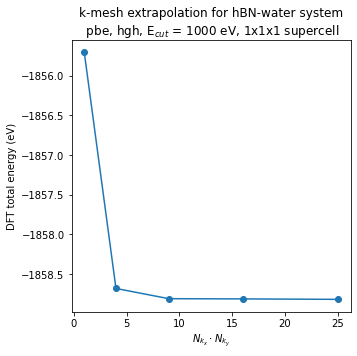

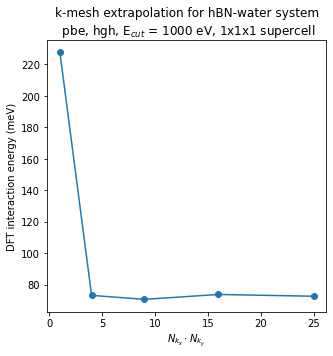

In [13]:
ecp = "hgh"
ecut_ev = 1000
plot_sizes_above = 0
df_to_plot = df[(df.ecp == ecp) & (df.ecut_ev == ecut_ev)].copy()
kmesh_sizes, int_energies = compute_int_energy(df_to_plot)
for plot_int_energy in [False, True]:
    plot_kmesh_extrapolation(
        df_to_plot[df_to_plot.Nk > plot_sizes_above],
        kmesh_sizes[kmesh_sizes > plot_sizes_above],
        int_energies[kmesh_sizes > plot_sizes_above],
        plot_int_energy=plot_int_energy,
    )